# S12 T01: Aprenentatge Supervisat - Regressions

## Descripció

Anem a practicar i a familiaritzar-nos amb regressions.

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error
 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn import preprocessing

import scipy.stats as stats
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
# Cárrega de la base de dades
db_vols = pd.read_csv('H:\_vertex\_formacio\_python - cibernarium\_12\DelayedFlights.csv')

# Donar estils a les taules
db_vols.style.set_table_styles([{'selector' : '','props' : [('border','5px solid green')]}])

db_vols.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


## Depuració de dades de la taula

In [3]:
# Faig una cópia per evitar de reexecutar tantes vegades 
vols = db_vols.copy()

In [4]:
# Eliminar columna anomenada Unnamed: 0
vols = vols.rename(columns={"Unnamed: 0": "id"})

# Fixar com a index la columna id
vols = vols.set_index('id')

# Elimina la columna index
#vols.drop('index', axis='columns', inplace=True)

vols.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [5]:
# Mida del dataframe
vols.shape

(1936758, 29)

In [6]:
# Fer cop d'ull als valors NULL
vols.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [7]:
# Elimino les columnes amb tants valors NULL
vols = vols.drop(['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis=1)

In [8]:
# Comprobació de que efectivamnent s'han eliminat aquestes columnes
vols.isna().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime                 0
CRSDepTime              0
ArrTime              7110
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
TailNum                 5
ActualElapsedTime    8387
CRSElapsedTime        198
AirTime              8387
ArrDelay             8387
DepDelay                0
Origin                  0
Dest                    0
Distance                0
TaxiIn               7110
TaxiOut               455
Cancelled               0
CancellationCode        0
Diverted                0
dtype: int64

In [9]:
# Potser fora convenient eliminar les files amb dades amb valor NULL
vols = vols.dropna(axis=0, how='any')
vols.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
dtype: int64

In [10]:
# Mida nova del dataframe
vols.shape

(1928368, 24)

In [11]:
# Estadístics de resum de cada columna categórica
vols.describe(include='object')

,UniqueCarrier,TailNum,Origin,Dest,CancellationCode
count,1928368,1928368,1928368,1928368,1928368
unique,20,5360,303,302,1
top,WN,N325SW,ATL,ORD,N
freq,376201,961,131213,108265,1928368


In [12]:
# Estadístics de resum de cada columna numérica
vols.describe().round(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
count,1928368.0,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.0,1928368.0
mean,2008.0,6.11,15.75,3.98,1518.65,1467.72,1610.24,1634.20,2184.29,133.31,134.20,108.28,42.20,43.09,764.95,6.81,18.22,0.0,0.0
std,0.0,3.48,8.78,2.00,450.44,424.73,548.00,464.63,1944.45,72.06,71.23,68.64,56.78,53.27,573.89,5.27,14.31,0.0,0.0
min,2008.0,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,14.00,-21.00,0.00,-109.00,6.00,11.00,0.00,0.00,0.0,0.0
25%,2008.0,3.00,8.00,2.00,1203.00,1135.00,1316.00,1325.00,611.00,80.00,82.00,58.00,9.00,12.00,338.00,4.00,10.00,0.0,0.0
50%,2008.0,6.00,16.00,4.00,1545.00,1510.00,1715.00,1705.00,1543.00,116.00,116.00,90.00,24.00,24.00,606.00,6.00,14.00,0.0,0.0
75%,2008.0,9.00,23.00,6.00,1900.00,1815.00,2030.00,2014.00,3423.00,165.00,165.00,137.00,56.00,53.00,997.00,8.00,21.00,0.0,0.0
max,2008.0,12.00,31.00,7.00,2400.00,2359.00,2400.00,2359.00,9741.00,1114.00,660.00,1091.00,2461.00,2467.00,4962.00,240.00,422.00,0.0,0.0


In [13]:
# Converteixo a categórica la variable número de vol
vols['FlightNum'] = vols['FlightNum'].apply(str)

In [14]:
# Estadístics de resum de cada columna categórica de nou
vols.describe(include='object')

,UniqueCarrier,FlightNum,TailNum,Origin,Dest,CancellationCode
count,1928368,1928368,1928368,1928368,1928368,1928368
unique,20,7498,5360,303,302,1
top,WN,16,N325SW,ATL,ORD,N
freq,376201,1575,961,131213,108265,1928368


In [15]:
# Elimino columnes per enir només un valor
vols = vols.drop(['CancellationCode', 'Year', 'Cancelled', 'Diverted'], axis=1)

In [16]:
# Elimino columnes que no serveixen per a fer regressions numériques
vols = vols.drop(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'], axis=1)

In [17]:
# Elimino columnes que no serveixen per a fer regressions numériques
vols = vols.drop(['CRSElapsedTime'], axis=1)

In [18]:
# Estadístics de resum de cada columna categórica de nou
vols.describe(include='object')

,UniqueCarrier,FlightNum,TailNum,Origin,Dest
count,1928368,1928368,1928368,1928368,1928368
unique,20,7498,5360,303,302
top,WN,16,N325SW,ATL,ORD
freq,376201,1575,961,131213,108265


In [19]:
# Estadístics de resum de cada columna numérica de nou
vols.describe().round(2)

,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut
count,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00
mean,133.31,108.28,42.20,43.09,764.95,6.81,18.22
std,72.06,68.64,56.78,53.27,573.89,5.27,14.31
min,14.00,0.00,-109.00,6.00,11.00,0.00,0.00
25%,80.00,58.00,9.00,12.00,338.00,4.00,10.00
50%,116.00,90.00,24.00,24.00,606.00,6.00,14.00
75%,165.00,137.00,56.00,53.00,997.00,8.00,21.00
max,1114.00,1091.00,2461.00,2467.00,4962.00,240.00,422.00


In [20]:
# Aspecte final del dataframe
vols.head()

,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
id,,,,,,,,,,,,
0,WN,335,N712SW,128.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0
1,WN,3231,N772SW,128.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0
2,WN,448,N428WN,96.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0
4,WN,3920,N464WN,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0
5,WN,378,N726SW,101.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0


In [21]:
# Mida final del dataframe
vols.shape

(1928368, 12)

In [22]:
# Per tal estalviar temps decalcul primer agafo una mostra aleatoria simple
mostra = 15000
vols = vols.sample(mostra,random_state=1357)

In [23]:
# Variable dependent
y = vols['ArrDelay']

# Variables predictores
x = vols.drop(['ArrDelay', 'UniqueCarrier', 'FlightNum', 'TailNum', 'Origin', 'Dest'], axis = 1)

# LLista amb el nom dels predictors
x_columnes = list(x.columns)

In [24]:
print(x_columnes)

['ActualElapsedTime', 'AirTime', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut']


In [25]:
# Creació de la mostra d'entrenament i validació
#seed(1234)
mostra_entrenament_x, mostra_validacio_x, mostra_entrenament_y, mostra_validacio_y = train_test_split(x, y, test_size = 0.2, random_state=567)

mostra_entrenament = pd.concat([mostra_entrenament_x, mostra_entrenament_y], axis=1)
mostra_validacio = pd.concat([mostra_validacio_x, mostra_validacio_y], axis=1)

print("Tamany de mostra d'entrenament: {}".format(mostra_entrenament_x.shape[0]))
print("Tamany de mostra de validació: {}".format(mostra_validacio_x.shape[0]))

display(mostra_entrenament)
display(mostra_entrenament_x.head())
display(mostra_entrenament_y.head())

display(mostra_validacio)
display(mostra_validacio_x.head())
display(mostra_validacio_y.head())

Tamany de mostra d'entrenament: 12000
Tamany de mostra de validació: 3000


,ActualElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,ArrDelay
id,,,,,,,
1020517,131.0,103.0,93.0,683,7.0,21.0,93.0
751521,107.0,83.0,10.0,425,14.0,10.0,-5.0
1528665,112.0,95.0,21.0,602,4.0,13.0,25.0
815631,313.0,292.0,31.0,2704,6.0,15.0,11.0
1169295,388.0,325.0,19.0,2248,6.0,57.0,15.0
...,...,...,...,...,...,...,...
3365651,338.0,309.0,20.0,2329,11.0,18.0,3.0
1214504,93.0,77.0,24.0,447,3.0,13.0,27.0
886636,65.0,42.0,15.0,271,5.0,18.0,15.0


,ActualElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut
id,,,,,,
1020517,131.0,103.0,93.0,683,7.0,21.0
751521,107.0,83.0,10.0,425,14.0,10.0
1528665,112.0,95.0,21.0,602,4.0,13.0
815631,313.0,292.0,31.0,2704,6.0,15.0
1169295,388.0,325.0,19.0,2248,6.0,57.0


id
1020517    93.0
751521     -5.0
1528665    25.0
815631     11.0
1169295    15.0
Name: ArrDelay, dtype: float64

,ActualElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,ArrDelay
id,,,,,,,
689285,255.0,224.0,16.0,2027,5.0,26.0,11.0
1513378,61.0,34.0,7.0,208,5.0,22.0,-1.0
80624,93.0,73.0,77.0,399,5.0,15.0,85.0
1239004,60.0,49.0,9.0,293,4.0,7.0,4.0
1327794,61.0,40.0,15.0,121,6.0,15.0,15.0
...,...,...,...,...,...,...,...
6618180,60.0,27.0,92.0,96,4.0,29.0,112.0
5023448,54.0,36.0,8.0,150,5.0,13.0,1.0
649241,142.0,127.0,43.0,781,6.0,9.0,35.0


,ActualElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut
id,,,,,,
689285,255.0,224.0,16.0,2027,5.0,26.0
1513378,61.0,34.0,7.0,208,5.0,22.0
80624,93.0,73.0,77.0,399,5.0,15.0
1239004,60.0,49.0,9.0,293,4.0,7.0
1327794,61.0,40.0,15.0,121,6.0,15.0


id
689285     11.0
1513378    -1.0
80624      85.0
1239004     4.0
1327794    15.0
Name: ArrDelay, dtype: float64

## Nivell 1

- Exercici 1

    Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

(0.0, 1000.0)

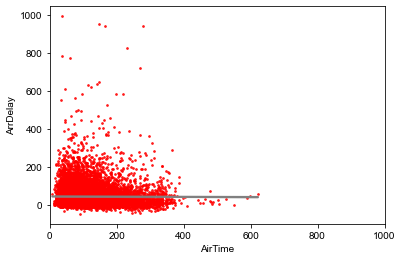

In [26]:
# Fem un cop d'ull a les regressions de forma individual per tal de veure quin aspecte 
fig, ax = plt.subplots()
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.regplot(x='AirTime', y='ArrDelay', data=mostra_entrenament, scatter_kws={"color": "red", 's':3}, line_kws={"color": "gray"})
ax.set_xlim(0,1000)

(0.0, 1000.0)

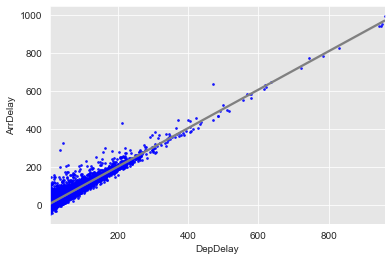

In [27]:
sns.regplot(x='DepDelay', y='ArrDelay', data=mostra_entrenament, scatter_kws={"color": "blue", 's':3}, line_kws={"color": "gray"}) 
ax.set_xlim(0,1000)

(0.0, 5000.0)

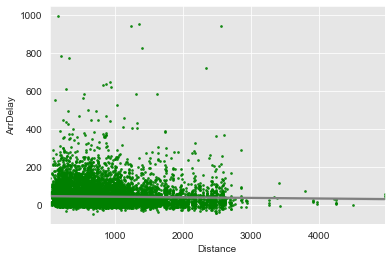

In [28]:
sns.regplot(x='Distance', y='ArrDelay', data=mostra_entrenament, scatter_kws={"color": "green", 's':3}, line_kws={"color": "gray"}) 
ax.set_xlim(0,5000)

(0.0, 350.0)

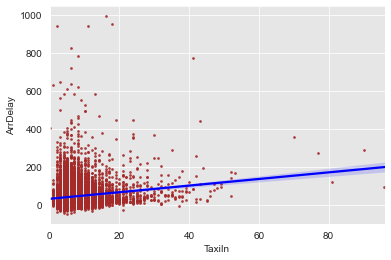

In [29]:
sns.regplot(x='TaxiIn', y='ArrDelay', data=mostra_entrenament, scatter_kws={"color": "brown", 's':3}, line_kws={"color": "blue"}) 
ax.set_xlim(0,350)

(0.0, 350.0)

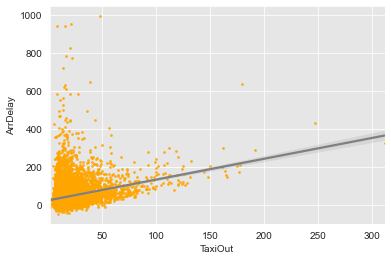

In [30]:
sns.regplot(x='TaxiOut', y='ArrDelay', data=mostra_entrenament, scatter_kws={"color": "orange", 's':3}, line_kws={"color": "gray"})
ax.set_xlim(0,350)

(0.0, 1000.0)

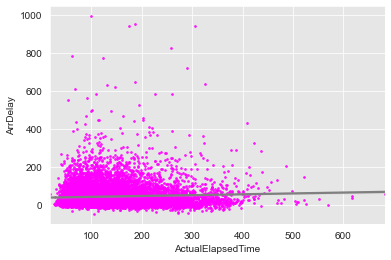

In [31]:
sns.regplot(x='ActualElapsedTime', y='ArrDelay', data=mostra_entrenament, scatter_kws={"color": "magenta", 's':3}, line_kws={"color": "gray"})
ax.set_xlim(0,1000)

 - Exercici 3

    Entrena’ls utilitzant els diferents paràmetres que admeten.

## Primer model de regressió

In [32]:
# Realitzem una primera regressió amb totes les columnes
mostra_entrenament_x = sm.add_constant(mostra_entrenament_x)
display(mostra_entrenament_x.head())
model_simple = sm.OLS(mostra_entrenament_y, mostra_entrenament_x).fit()

print(model_simple.summary())

,const,ActualElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut
id,,,,,,,
1020517,1.0,131.0,103.0,93.0,683,7.0,21.0
751521,1.0,107.0,83.0,10.0,425,14.0,10.0
1528665,1.0,112.0,95.0,21.0,602,4.0,13.0
815631,1.0,313.0,292.0,31.0,2704,6.0,15.0
1169295,1.0,388.0,325.0,19.0,2248,6.0,57.0


                            OLS Regression Results                            
Dep. Variable:               ArrDelay   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 8.161e+04
Date:                Sat, 12 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:29:42   Log-Likelihood:                -44626.
No. Observations:               12000   AIC:                         8.926e+04
Df Residuals:                   11994   BIC:                         8.931e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -24.0422      0.24

## Segon model de regressió

In [33]:
display(mostra_entrenament_x)

# Eliminem columna const
mostra_entrenament_x_nova = mostra_entrenament_x.drop(mostra_entrenament_x[['const']],axis=1)
display(mostra_entrenament_x_nova.head())

,const,ActualElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut
id,,,,,,,
1020517,1.0,131.0,103.0,93.0,683,7.0,21.0
751521,1.0,107.0,83.0,10.0,425,14.0,10.0
1528665,1.0,112.0,95.0,21.0,602,4.0,13.0
815631,1.0,313.0,292.0,31.0,2704,6.0,15.0
1169295,1.0,388.0,325.0,19.0,2248,6.0,57.0
...,...,...,...,...,...,...,...
3365651,1.0,338.0,309.0,20.0,2329,11.0,18.0
1214504,1.0,93.0,77.0,24.0,447,3.0,13.0
886636,1.0,65.0,42.0,15.0,271,5.0,18.0


,ActualElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut
id,,,,,,
1020517,131.0,103.0,93.0,683,7.0,21.0
751521,107.0,83.0,10.0,425,14.0,10.0
1528665,112.0,95.0,21.0,602,4.0,13.0
815631,313.0,292.0,31.0,2704,6.0,15.0
1169295,388.0,325.0,19.0,2248,6.0,57.0


In [34]:
# Realitzem una segona regressió mitjançant el métode anomenat LASSO
model_lasso = LassoCV()
model_lasso = model_lasso.fit(mostra_entrenament_x_nova, mostra_entrenament_y)

# Intercept del model
print("1. L'intercept és: {}\n2. Els coeficients del model de regresssió són: {}".format(round(model_lasso.intercept_,2), model_lasso.coef_.round(2)))

1. L'intercept és: -23.35
2. Els coeficients del model de regresssió són: [ 0.43 -0.02  0.99 -0.05  0.16  0.35]


## Tercer model de regressió

In [35]:
# Realitzem una tercera regressió mitjançant el métode anomenat Ridge
model_ridgecv = RidgeCV()
model_ridgecv = model_ridgecv.fit(mostra_entrenament_x_nova, mostra_entrenament_y)

# Intercept del model
print("1. L'intercept és: {}\n2. Els coeficients del model de regresssió són: {}".format(round(model_ridgecv.intercept_,2), model_ridgecv.coef_.round(2)))

1. L'intercept és: -24.04
2. Els coeficients del model de regresssió són: [ 0.47 -0.09  0.99 -0.05  0.24  0.32]


- Exercici 2

    Compara’ls en base al MSE i al R2.

## MSE

In [36]:
# Obtenció dels diferents MSE
model_simple_prediccio = model_simple.predict(mostra_entrenament_x)
model_simple_mse = mean_squared_error(mostra_entrenament_y, model_simple_prediccio)

In [37]:
model_lasso_prediccio = model_lasso.predict(mostra_entrenament_x_nova)
model_lasso_mse = mean_squared_error(mostra_entrenament_y, model_lasso_prediccio)

In [38]:
model_ridgecv_prediccio = model_ridgecv.predict(mostra_entrenament_x_nova)
model_ridgecv_mse = mean_squared_error(mostra_entrenament_y, model_ridgecv_prediccio)

In [39]:
print("Els MSE per als diferents models de regressió son:\n- Simple:     {}\n- Lasso:      {}\n- RidgeCV:    {}".format(round(model_simple_mse,2), round(model_lasso_mse,2), round(model_ridgecv_mse,2)))

Els MSE per als diferents models de regressió son:
- Simple:     99.47
- Lasso:      99.98
- RidgeCV:    99.47


## R²

In [40]:
# Obtenció dels diferents R²
model_simple_R2 = model_simple.rsquared
model_simple_R2_ajustat = 1-(1-model_simple_R2)*(mostra_entrenament_x.shape[0]-1)/(mostra_entrenament_x.shape[0]-len(mostra_entrenament_x.columns)-1)

In [41]:
model_lasso_R2 = model_lasso.score(mostra_entrenament_x_nova, mostra_entrenament_y)
model_lasso_R2_ajustat = 1-(1-model_lasso_R2)*(mostra_entrenament_x.shape[0]-1)/(mostra_entrenament_x.shape[0]-len(mostra_entrenament_x.columns)-1)

In [42]:
model_ridgecv_R2 = model_ridgecv.score(mostra_entrenament_x_nova, mostra_entrenament_y)
model_ridgecv_R2_ajustat = 1-(1-model_ridgecv_R2)*(mostra_entrenament_x.shape[0]-1)/(mostra_entrenament_x.shape[0]-len(mostra_entrenament_x.columns)-1)

In [43]:
print("Els R2 per als diferents models de regressió son:\n- Simple:     {}\n- Lasso:      {}\n- RidgeCV:    {}\n".format(round(model_simple_R2,5), round(model_lasso_R2,5), round(model_ridgecv_R2,5)))
print("Els R2 ajustats per als diferents models de regressió son:\n- Simple:     {}\n- Lasso:      {}\n- RidgeCV:    {}".format(round(model_simple_R2_ajustat,5), round(model_lasso_R2_ajustat,5), round(model_ridgecv_R2_ajustat,5)))

Els R2 per als diferents models de regressió son:
- Simple:     0.97145
- Lasso:      0.9713
- RidgeCV:    0.97145

Els R2 ajustats per als diferents models de regressió son:
- Simple:     0.97143
- Lasso:      0.97128
- RidgeCV:    0.97143


 - Exercici 4

    Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna).

## MSE

In [44]:
# Obtenció dels diferents MSE en la mostra de validació
mostra_validacio_x = sm.add_constant(mostra_validacio_x)
display(mostra_validacio_x.head())

model_simple_validacio_prediccio = model_simple.predict(mostra_validacio_x)
model_simple_validacio_prediccio_mse = mean_squared_error(mostra_validacio_y, model_simple_validacio_prediccio)

,const,ActualElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut
id,,,,,,,
689285,1.0,255.0,224.0,16.0,2027,5.0,26.0
1513378,1.0,61.0,34.0,7.0,208,5.0,22.0
80624,1.0,93.0,73.0,77.0,399,5.0,15.0
1239004,1.0,60.0,49.0,9.0,293,4.0,7.0
1327794,1.0,61.0,40.0,15.0,121,6.0,15.0


In [45]:
# Eliminem columna const
mostra_validacio_x_nova = mostra_validacio_x.drop(mostra_validacio_x[['const']],axis=1)
display(mostra_entrenament_x_nova.head())

model_lasso_validacio_prediccio = model_lasso.predict(mostra_validacio_x_nova)
model_lasso_validacio_prediccio_mse = mean_squared_error(mostra_validacio_y, model_lasso_validacio_prediccio)

,ActualElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut
id,,,,,,
1020517,131.0,103.0,93.0,683,7.0,21.0
751521,107.0,83.0,10.0,425,14.0,10.0
1528665,112.0,95.0,21.0,602,4.0,13.0
815631,313.0,292.0,31.0,2704,6.0,15.0
1169295,388.0,325.0,19.0,2248,6.0,57.0


In [46]:
model_ridgecv_validacio_prediccio = model_ridgecv.predict(mostra_validacio_x_nova)
model_ridgecv_validacio_prediccio_mse = mean_squared_error(mostra_validacio_y, model_ridgecv_validacio_prediccio)

In [47]:
print("Els MSE per als diferents models de regressió en la mostra de validació son:\n- Simple:     {}\n- Lasso:      {}\n- RidgeCV:    {}".format(round(model_simple_validacio_prediccio_mse,2), round(model_lasso_validacio_prediccio_mse,2), round(model_ridgecv_validacio_prediccio_mse,2)))

Els MSE per als diferents models de regressió en la mostra de validació son:
- Simple:     109.38
- Lasso:      109.63
- RidgeCV:    109.38


## R²

In [48]:
# Obtenció dels diferents R²
model_simple_validacio_prediccio_R2 = 1-(model_simple_validacio_prediccio-mostra_validacio_y).var()/mostra_validacio_y.var()
model_simple_validacio_prediccio_R2_ajustat = 1-(1-model_simple_validacio_prediccio_R2)*(mostra_validacio_x.shape[0]-1)/(mostra_validacio_x.shape[0]-len(mostra_validacio_x.columns)-1)

In [49]:
model_lasso_validacio_prediccio_R2 = model_lasso.score(mostra_validacio_x_nova, mostra_validacio_y)
model_lasso_validacio_prediccio_R2_ajustat = 1-(1-model_lasso_validacio_prediccio_R2)*(mostra_entrenament_x.shape[0]-1)/(mostra_entrenament_x.shape[0]-len(mostra_entrenament_x.columns)-1)

In [50]:
model_ridgecv_validacio_prediccio_R2 = model_ridgecv.score(mostra_validacio_x_nova, mostra_validacio_y)
model_ridgecv_validacio_prediccio_R2_ajustat = 1-(1-model_ridgecv_validacio_prediccio_R2)*(mostra_validacio_x.shape[0]-1)/(mostra_validacio_x.shape[0]-len(mostra_validacio_x.columns)-1)

In [51]:
print("Els R2 per als diferents models de regressió son:\n- Simple:     {}\n- Lasso:      {}\n- RidgeCV:    {}\n".format(round(model_simple_validacio_prediccio_R2,5), round(model_lasso_validacio_prediccio_R2,5), round(model_ridgecv_validacio_prediccio_R2,5)))
print("Els R2 ajustats per als diferents models de regressió son:\n- Simple:     {}\n- Lasso:      {}\n- RidgeCV:    {}".format(round(model_simple_validacio_prediccio_R2_ajustat,5), round(model_lasso_validacio_prediccio_R2_ajustat,5), round(model_ridgecv_validacio_prediccio_R2_ajustat,5)))

Els R2 per als diferents models de regressió son:
- Simple:     0.96255
- Lasso:      0.9624
- RidgeCV:    0.96249

Els R2 ajustats per als diferents models de regressió son:
- Simple:     0.96246
- Lasso:      0.96238
- RidgeCV:    0.9624


## Nivell 2

- Exercici 5

    Realitza algun procés d’enginyeria de variables per millorar-ne la predicció.

In [52]:
# Refarem el dataframe de vols per tla de normalitzar-lo
# Primer mirem quines columnes normalitzar, és a dir, numériques
columnes_a_normalitzar = []
columnes_a_normalitzar.extend(x.columns)
columnes_a_normalitzar.insert(len(columnes_a_normalitzar),y.name)

print(columnes_a_normalitzar)

['ActualElapsedTime', 'AirTime', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'ArrDelay']


In [53]:
# Fem cópia de 'vols'
vols_normalitzat = vols.copy()
vols_normalitzat = vols_normalitzat[columnes_a_normalitzar]

# Normalitzem 'vols' --> 'vols_normlaitzat'
normalitzador = preprocessing.MinMaxScaler()
vols_normalitzat_normalitzades = normalitzador.fit_transform(vols_normalitzat)

display(vols_normalitzat_normalitzades)

array([[0.18646617, 0.19543974, 0.01464844, ..., 0.0625    , 0.0224359 ,
        0.05792972],
       [0.15789474, 0.15798046, 0.03808594, ..., 0.05208333, 0.03846154,
        0.08547009],
       [0.09774436, 0.07166124, 0.00390625, ..., 0.03125   , 0.08653846,
        0.0294397 ],
       ...,
       [0.21052632, 0.20358306, 0.06835938, ..., 0.05208333, 0.06089744,
        0.09211776],
       [0.16691729, 0.12540717, 0.01269531, ..., 0.27083333, 0.05448718,
        0.08072175],
       [0.06616541, 0.04560261, 0.        , ..., 0.13541667, 0.03846154,
        0.04843305]])

In [54]:
# Materialitzem la nomralització en el dataframe
k = 0
print(columnes_a_normalitzar)
#columnes_a_normalitzar = []
for columna in columnes_a_normalitzar:
    vols_normalitzat[columna] = vols_normalitzat_normalitzades[:,k]
    k = k + 1

display(vols_normalitzat)

['ActualElapsedTime', 'AirTime', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'ArrDelay']


,ActualElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,ArrDelay
id,,,,,,,
3696449,0.186466,0.195440,0.014648,0.183736,0.062500,0.022436,0.057930
6652612,0.157895,0.157980,0.038086,0.131008,0.052083,0.038462,0.085470
3639563,0.097744,0.071661,0.003906,0.052525,0.031250,0.086538,0.029440
2194623,0.088722,0.042345,0.002930,0.029609,0.052083,0.118590,0.065527
6222288,0.524812,0.480456,0.007812,0.495640,0.395833,0.080128,0.088319
...,...,...,...,...,...,...,...
2713469,0.069173,0.063518,0.022461,0.028392,0.083333,0.025641,0.069326
5926114,0.201504,0.192182,0.166016,0.211925,0.125000,0.041667,0.189934
570932,0.210526,0.203583,0.068359,0.181302,0.052083,0.060897,0.092118


In [55]:
## Variable dependent
y = vols_normalitzat['ArrDelay']

# Variables predictores
x = vols_normalitzat.drop(['ArrDelay'], axis = 1)

# LLista amb el nom dels predictors
x_columnes = list(x.columns)

In [56]:
# Creació de la mostra d'entrenament i validació
mostra_entrenament_normalitzada_x, mostra_validacio_normalitzada_x, mostra_entrenament_normalitzada_y, mostra_validacio_normalitzada_y = train_test_split(x, y, test_size = 0.2, random_state=567)

mostra_entrenament_normalitzada = pd.concat([mostra_entrenament_normalitzada_x, mostra_entrenament_normalitzada_y], axis=1)
mostra_validacio_normalitzada = pd.concat([mostra_validacio_normalitzada_x, mostra_validacio_normalitzada_y], axis=1)

print("Tamany de mostra d'entrenament: {}".format(mostra_entrenament_normalitzada_x.shape[0]))
print("Tamany de mostra de validació: {}".format(mostra_validacio_normalitzada_x.shape[0]))

display(mostra_entrenament_normalitzada)
display(mostra_entrenament_normalitzada_x.head())
display(mostra_entrenament_normalitzada_y.head())

display(mostra_validacio_normalitzada)
display(mostra_validacio_normalitzada_x.head())
display(mostra_validacio_normalitzada_y.head())

Tamany de mostra d'entrenament: 12000
Tamany de mostra de validació: 3000


,ActualElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,ArrDelay
id,,,,,,,
1020517,0.171429,0.154723,0.084961,0.132225,0.072917,0.067308,0.134853
751521,0.135338,0.122150,0.003906,0.079903,0.145833,0.032051,0.041785
1528665,0.142857,0.141694,0.014648,0.115798,0.041667,0.041667,0.070275
815631,0.445113,0.462541,0.024414,0.542081,0.062500,0.048077,0.056980
1169295,0.557895,0.516287,0.012695,0.449605,0.062500,0.182692,0.060779
...,...,...,...,...,...,...,...
3365651,0.482707,0.490228,0.013672,0.466031,0.114583,0.057692,0.049383
1214504,0.114286,0.112378,0.017578,0.084364,0.031250,0.041667,0.072175
886636,0.072180,0.055375,0.008789,0.048672,0.052083,0.057692,0.060779


,ActualElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut
id,,,,,,
1020517,0.171429,0.154723,0.084961,0.132225,0.072917,0.067308
751521,0.135338,0.122150,0.003906,0.079903,0.145833,0.032051
1528665,0.142857,0.141694,0.014648,0.115798,0.041667,0.041667
815631,0.445113,0.462541,0.024414,0.542081,0.062500,0.048077
1169295,0.557895,0.516287,0.012695,0.449605,0.062500,0.182692


id
1020517    0.134853
751521     0.041785
1528665    0.070275
815631     0.056980
1169295    0.060779
Name: ArrDelay, dtype: float64

,ActualElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut,ArrDelay
id,,,,,,,
689285,0.357895,0.351792,0.009766,0.404786,0.052083,0.083333,0.056980
1513378,0.066165,0.042345,0.000977,0.035895,0.052083,0.070513,0.045584
80624,0.114286,0.105863,0.069336,0.074630,0.052083,0.048077,0.127255
1239004,0.064662,0.066775,0.002930,0.053133,0.041667,0.022436,0.050332
1327794,0.066165,0.052117,0.008789,0.018252,0.062500,0.048077,0.060779
...,...,...,...,...,...,...,...
6618180,0.064662,0.030945,0.083984,0.013182,0.041667,0.092949,0.152896
5023448,0.055639,0.045603,0.001953,0.024133,0.052083,0.041667,0.047483
649241,0.187970,0.193811,0.036133,0.152099,0.062500,0.028846,0.079772


,ActualElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut
id,,,,,,
689285,0.357895,0.351792,0.009766,0.404786,0.052083,0.083333
1513378,0.066165,0.042345,0.000977,0.035895,0.052083,0.070513
80624,0.114286,0.105863,0.069336,0.074630,0.052083,0.048077
1239004,0.064662,0.066775,0.002930,0.053133,0.041667,0.022436
1327794,0.066165,0.052117,0.008789,0.018252,0.062500,0.048077


id
689285     0.056980
1513378    0.045584
80624      0.127255
1239004    0.050332
1327794    0.060779
Name: ArrDelay, dtype: float64

(0.0, 1.0)

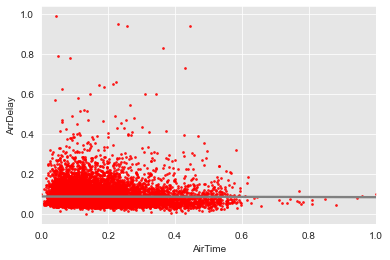

In [57]:
# Fem un cop d'ull a les regressions de forma individual per tal de veure quin aspecte 
fig, ax = plt.subplots()
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.regplot(x='AirTime', y='ArrDelay', data=mostra_entrenament_normalitzada, scatter_kws={"color": "red", 's':3}, line_kws={"color": "gray"})
ax.set_xlim(0,1)

(0.0, 1.0)

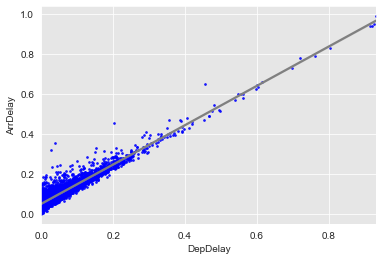

In [58]:
sns.regplot(x='DepDelay', y='ArrDelay', data=mostra_entrenament_normalitzada, scatter_kws={"color": "blue", 's':3}, line_kws={"color": "gray"}) 
ax.set_xlim(0,1)

(0.0, 1.0)

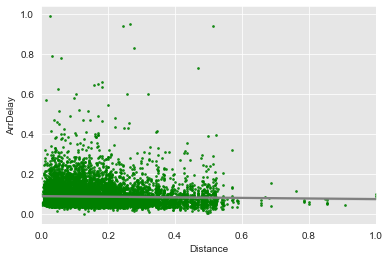

In [59]:
sns.regplot(x='Distance', y='ArrDelay', data=mostra_entrenament_normalitzada, scatter_kws={"color": "green", 's':3}, line_kws={"color": "gray"}) 
ax.set_xlim(0,1)

(0.0, 1.0)

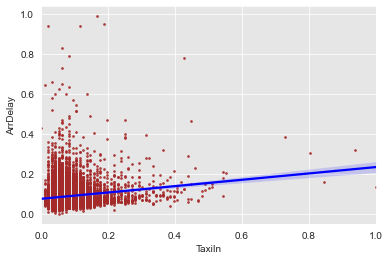

In [60]:
sns.regplot(x='TaxiIn', y='ArrDelay', data=mostra_entrenament_normalitzada, scatter_kws={"color": "brown", 's':3}, line_kws={"color": "blue"}) 
ax.set_xlim(0,1)

(0.0, 1.0)

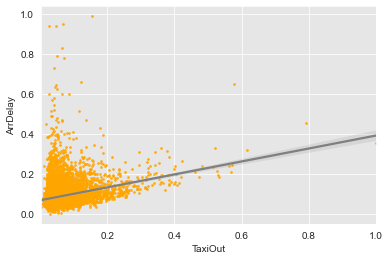

In [61]:
sns.regplot(x='TaxiOut', y='ArrDelay', data=mostra_entrenament_normalitzada, scatter_kws={"color": "orange", 's':3}, line_kws={"color": "gray"})
ax.set_xlim(0,1)

(0.0, 1.0)

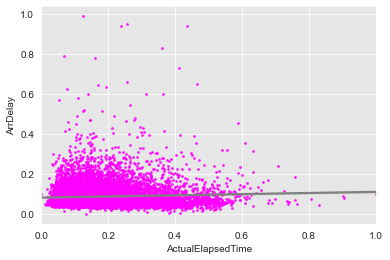

In [62]:
sns.regplot(x='ActualElapsedTime', y='ArrDelay', data=mostra_entrenament_normalitzada, scatter_kws={"color": "magenta", 's':3}, line_kws={"color": "gray"})
ax.set_xlim(0,1)

## Primer model de regressió

In [63]:
# Realitzem una primera regressió amb totes les columnes
mostra_entrenament_normalitzada_x = sm.add_constant(mostra_entrenament_normalitzada_x)
display(mostra_entrenament_normalitzada_x.head())
model_simple = sm.OLS(mostra_entrenament_normalitzada_y, mostra_entrenament_normalitzada_x).fit()

print(model_simple.summary())

,const,ActualElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut
id,,,,,,,
1020517,1.0,0.171429,0.154723,0.084961,0.132225,0.072917,0.067308
751521,1.0,0.135338,0.122150,0.003906,0.079903,0.145833,0.032051
1528665,1.0,0.142857,0.141694,0.014648,0.115798,0.041667,0.041667
815631,1.0,0.445113,0.462541,0.024414,0.542081,0.062500,0.048077
1169295,1.0,0.557895,0.516287,0.012695,0.449605,0.062500,0.182692


                            OLS Regression Results                            
Dep. Variable:               ArrDelay   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 8.161e+04
Date:                Sat, 12 Jun 2021   Prob (F-statistic):               0.00
Time:                        12:29:53   Log-Likelihood:                 38886.
No. Observations:               12000   AIC:                        -7.776e+04
Df Residuals:                   11994   BIC:                        -7.772e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0330      0.00

## Segon model de regressió

In [64]:
display(mostra_entrenament_normalitzada_x)

# Eliminem columna const
mostra_entrenament_normalitzada_x_nova = mostra_entrenament_normalitzada_x.drop(mostra_entrenament_normalitzada_x[['const']],axis=1)
display(mostra_entrenament_normalitzada_x_nova.head())


,const,ActualElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut
id,,,,,,,
1020517,1.0,0.171429,0.154723,0.084961,0.132225,0.072917,0.067308
751521,1.0,0.135338,0.122150,0.003906,0.079903,0.145833,0.032051
1528665,1.0,0.142857,0.141694,0.014648,0.115798,0.041667,0.041667
815631,1.0,0.445113,0.462541,0.024414,0.542081,0.062500,0.048077
1169295,1.0,0.557895,0.516287,0.012695,0.449605,0.062500,0.182692
...,...,...,...,...,...,...,...
3365651,1.0,0.482707,0.490228,0.013672,0.466031,0.114583,0.057692
1214504,1.0,0.114286,0.112378,0.017578,0.084364,0.031250,0.041667
886636,1.0,0.072180,0.055375,0.008789,0.048672,0.052083,0.057692


,ActualElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut
id,,,,,,
1020517,0.171429,0.154723,0.084961,0.132225,0.072917,0.067308
751521,0.135338,0.122150,0.003906,0.079903,0.145833,0.032051
1528665,0.142857,0.141694,0.014648,0.115798,0.041667,0.041667
815631,0.445113,0.462541,0.024414,0.542081,0.062500,0.048077
1169295,0.557895,0.516287,0.012695,0.449605,0.062500,0.182692


In [65]:
# Realitzem una segona regressió mitjançant el métode anomenat LASSO
model_lasso = LassoCV()
model_lasso = model_lasso.fit(mostra_entrenament_normalitzada_x_nova, mostra_entrenament_normalitzada_y)

# Intercept del model
print("1. L'intercept és: {}\n2. Els coeficients del model de regresssió són: {}".format(round(model_lasso.intercept_,2), model_lasso.coef_.round(2)))

1. L'intercept és: 0.03
2. Els coeficients del model de regresssió són: [ 0.24  0.    0.96 -0.22  0.03  0.12]


## Tercer model de regressió

In [66]:
## Tercer model de regressió
# Realitzem una tercera regressió mitjançant el métode anomenat Ridge
model_ridgecv = RidgeCV()
model_ridgecv = model_ridgecv.fit(mostra_entrenament_normalitzada_x_nova, mostra_entrenament_normalitzada_y)

# Intercept del model
print("1. L'intercept és: {}\n2. Els coeficients del model de regresssió són: {}".format(round(model_ridgecv.intercept_,2), model_ridgecv.coef_.round(2)))

1. L'intercept és: 0.03
2. Els coeficients del model de regresssió són: [ 0.15  0.08  0.96 -0.23  0.04  0.16]


## R² - entrenament

In [67]:
# Obtenció dels diferents R²
model_simple_R2 = model_simple.rsquared
model_simple_R2_ajustat = 1-(1-model_simple_R2)*(mostra_entrenament_normalitzada_x.shape[0]-1)/(mostra_entrenament_normalitzada_x.shape[0]-len(mostra_entrenament_normalitzada_x.columns)-1)

model_lasso_R2 = model_lasso.score(mostra_entrenament_normalitzada_x_nova, mostra_entrenament_normalitzada_y)
model_lasso_R2_ajustat = 1-(1-model_lasso_R2)*(mostra_entrenament_normalitzada_x.shape[0]-1)/(mostra_entrenament_normalitzada_x.shape[0]-len(mostra_entrenament_normalitzada_x.columns)-1)

model_ridgecv_R2 = model_ridgecv.score(mostra_entrenament_normalitzada_x_nova, mostra_entrenament_normalitzada_y)
model_ridgecv_R2_ajustat = 1-(1-model_ridgecv_R2)*(mostra_entrenament_normalitzada_x.shape[0]-1)/(mostra_entrenament_normalitzada_x.shape[0]-len(mostra_entrenament_normalitzada_x.columns)-1)

print("Els R2 per als diferents models de regressió son:\n- Simple:     {}\n- Lasso:      {}\n- RidgeCV:    {}\n".format(round(model_simple_R2,5), round(model_lasso_R2,5), round(model_ridgecv_R2,5)))
print("Els R2 ajustats per als diferents models de regressió son:\n- Simple:     {}\n- Lasso:      {}\n- RidgeCV:    {}".format(round(model_simple_R2_ajustat,5), round(model_lasso_R2_ajustat,5), round(model_ridgecv_R2_ajustat,5)))
model_simple_mse = mean_squared_error(mostra_entrenament_normalitzada_y, model_simple_prediccio)

Els R2 per als diferents models de regressió son:
- Simple:     0.97145
- Lasso:      0.97143
- RidgeCV:    0.97144

Els R2 ajustats per als diferents models de regressió son:
- Simple:     0.97143
- Lasso:      0.97142
- RidgeCV:    0.97142


## R² - validació

In [68]:
mostra_validacio_normalitzada_x = sm.add_constant(mostra_validacio_normalitzada_x)
model_simple_validacio_normalitzada_prediccio = model_simple.predict(mostra_validacio_normalitzada_x)
# Eliminem columna const
mostra_validacio_normalitzada_x_nova = mostra_validacio_normalitzada_x.drop(mostra_validacio_normalitzada_x[['const']],axis=1)
model_lasso_validacio_normalitzada_prediccio = model_lasso.predict(mostra_validacio_normalitzada_x_nova)
model_ridgecv_validacio_normalitzada_prediccio = model_ridgecv.predict(mostra_validacio_normalitzada_x_nova)

# Obtenció dels diferents R²
model_simple_validacio_normalitzada_prediccio_R2 = 1-(model_simple_validacio_normalitzada_prediccio-mostra_validacio_normalitzada_y).var()/mostra_validacio_normalitzada_y.var()
model_simple_validacio_normalitzada_prediccio_R2_ajustat = 1-(1-model_simple_validacio_normalitzada_prediccio_R2)*(mostra_validacio_normalitzada_x.shape[0]-1)/(mostra_validacio_normalitzada_x.shape[0]-len(mostra_validacio_normalitzada_x.columns)-1)

# Eliminem columna const
mostra_validacio_normalitzada_x_nova = mostra_validacio_normalitzada_x.drop(mostra_validacio_normalitzada_x[['const']],axis=1)
display(mostra_entrenament_normalitzada_x_nova.head())

model_lasso_validacio_normalitzada_prediccio_R2 = model_lasso.score(mostra_validacio_normalitzada_x_nova, mostra_validacio_normalitzada_y)
model_lasso_validacio_normalitzada_prediccio_R2_ajustat = 1-(1-model_lasso_validacio_normalitzada_prediccio_R2)*(mostra_entrenament_normalitzada_x.shape[0]-1)/(mostra_entrenament_normalitzada_x.shape[0]-len(mostra_entrenament_normalitzada_x.columns)-1)

model_ridgecv_validacio_normalitzada_prediccio_R2 = model_ridgecv.score(mostra_validacio_normalitzada_x_nova, mostra_validacio_normalitzada_y)
model_ridgecv_validacio_normalitzada_prediccio_R2_ajustat = 1-(1-model_ridgecv_validacio_normalitzada_prediccio_R2)*(mostra_validacio_normalitzada_x.shape[0]-1)/(mostra_validacio_normalitzada_x.shape[0]-len(mostra_validacio_normalitzada_x.columns)-1)

print("Els R2 per als diferents models de regressió son:\n- Simple:     {}\n- Lasso:      {}\n- RidgeCV:    {}\n".format(round(model_simple_validacio_normalitzada_prediccio_R2,5), round(model_lasso_validacio_normalitzada_prediccio_R2,5), round(model_ridgecv_validacio_normalitzada_prediccio_R2,5)))
print("Els R2 ajustats per als diferents models de regressió son:\n- Simple:     {}\n- Lasso:      {}\n- RidgeCV:    {}".format(round(model_simple_validacio_normalitzada_prediccio_R2_ajustat,5), round(model_lasso_validacio_normalitzada_prediccio_R2_ajustat,5), round(model_ridgecv_validacio_normalitzada_prediccio_R2_ajustat,5)))

,ActualElapsedTime,AirTime,DepDelay,Distance,TaxiIn,TaxiOut
id,,,,,,
1020517,0.171429,0.154723,0.084961,0.132225,0.072917,0.067308
751521,0.135338,0.122150,0.003906,0.079903,0.145833,0.032051
1528665,0.142857,0.141694,0.014648,0.115798,0.041667,0.041667
815631,0.445113,0.462541,0.024414,0.542081,0.062500,0.048077
1169295,0.557895,0.516287,0.012695,0.449605,0.062500,0.182692


Els R2 per als diferents models de regressió son:
- Simple:     0.96255
- Lasso:      0.96246
- RidgeCV:    0.96249

Els R2 ajustats per als diferents models de regressió son:
- Simple:     0.96246
- Lasso:      0.96244
- RidgeCV:    0.9624


## Nivell 3

- Exercici 6

    No utilitzis la variable DepDelay a l’hora de fer prediccions.

In [69]:
# Refem-ho tot sense 'DepDelay'

## Variable dependent
y = vols_normalitzat['ArrDelay']

# Variables predictores
x = vols_normalitzat.drop(['ArrDelay', 'DepDelay'], axis = 1)

# LLista amb el nom dels predictors
x_columnes = list(x.columns)

In [70]:
# Creació de la mostra d'entrenament i validació
mostra_entrenament_normalitzada_senseDepDelay_x, mostra_validacio_normalitzada_senseDepDelay_x, mostra_entrenament_normalitzada_senseDepDelay_y, mostra_validacio_normalitzada_senseDepDelay_y = train_test_split(x, y, test_size = 0.2, random_state=567)

mostra_entrenament_normalitzada_senseDepDelay = pd.concat([mostra_entrenament_normalitzada_senseDepDelay_x, mostra_entrenament_normalitzada_senseDepDelay_y], axis=1)
mostra_validacio_normalitzada_senseDepDelay = pd.concat([mostra_validacio_normalitzada_senseDepDelay_x, mostra_validacio_normalitzada_senseDepDelay_y], axis=1)

print("Tamany de mostra d'entrenament: {}".format(mostra_entrenament_normalitzada_senseDepDelay_x.shape[0]))
print("Tamany de mostra de validació: {}".format(mostra_validacio_normalitzada_senseDepDelay_x.shape[0]))

display(mostra_entrenament_normalitzada_senseDepDelay)
display(mostra_entrenament_normalitzada_senseDepDelay_x.head())
display(mostra_entrenament_normalitzada_senseDepDelay_y.head())

display(mostra_validacio_normalitzada_senseDepDelay)
display(mostra_validacio_normalitzada_senseDepDelay_x.head())
display(mostra_validacio_normalitzada_senseDepDelay_y.head())

Tamany de mostra d'entrenament: 12000
Tamany de mostra de validació: 3000


,ActualElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,ArrDelay
id,,,,,,
1020517,0.171429,0.154723,0.132225,0.072917,0.067308,0.134853
751521,0.135338,0.122150,0.079903,0.145833,0.032051,0.041785
1528665,0.142857,0.141694,0.115798,0.041667,0.041667,0.070275
815631,0.445113,0.462541,0.542081,0.062500,0.048077,0.056980
1169295,0.557895,0.516287,0.449605,0.062500,0.182692,0.060779
...,...,...,...,...,...,...
3365651,0.482707,0.490228,0.466031,0.114583,0.057692,0.049383
1214504,0.114286,0.112378,0.084364,0.031250,0.041667,0.072175
886636,0.072180,0.055375,0.048672,0.052083,0.057692,0.060779


,ActualElapsedTime,AirTime,Distance,TaxiIn,TaxiOut
id,,,,,
1020517,0.171429,0.154723,0.132225,0.072917,0.067308
751521,0.135338,0.122150,0.079903,0.145833,0.032051
1528665,0.142857,0.141694,0.115798,0.041667,0.041667
815631,0.445113,0.462541,0.542081,0.062500,0.048077
1169295,0.557895,0.516287,0.449605,0.062500,0.182692


id
1020517    0.134853
751521     0.041785
1528665    0.070275
815631     0.056980
1169295    0.060779
Name: ArrDelay, dtype: float64

,ActualElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,ArrDelay
id,,,,,,
689285,0.357895,0.351792,0.404786,0.052083,0.083333,0.056980
1513378,0.066165,0.042345,0.035895,0.052083,0.070513,0.045584
80624,0.114286,0.105863,0.074630,0.052083,0.048077,0.127255
1239004,0.064662,0.066775,0.053133,0.041667,0.022436,0.050332
1327794,0.066165,0.052117,0.018252,0.062500,0.048077,0.060779
...,...,...,...,...,...,...
6618180,0.064662,0.030945,0.013182,0.041667,0.092949,0.152896
5023448,0.055639,0.045603,0.024133,0.052083,0.041667,0.047483
649241,0.187970,0.193811,0.152099,0.062500,0.028846,0.079772


,ActualElapsedTime,AirTime,Distance,TaxiIn,TaxiOut
id,,,,,
689285,0.357895,0.351792,0.404786,0.052083,0.083333
1513378,0.066165,0.042345,0.035895,0.052083,0.070513
80624,0.114286,0.105863,0.074630,0.052083,0.048077
1239004,0.064662,0.066775,0.053133,0.041667,0.022436
1327794,0.066165,0.052117,0.018252,0.062500,0.048077


id
689285     0.056980
1513378    0.045584
80624      0.127255
1239004    0.050332
1327794    0.060779
Name: ArrDelay, dtype: float64

## Primer model de regressió

In [71]:
# Realitzem una primera regressió amb totes les columnes
mostra_entrenament_normalitzada_senseDepDelay_x = sm.add_constant(mostra_entrenament_normalitzada_senseDepDelay_x)
display(mostra_entrenament_normalitzada_senseDepDelay_x.head())
model_simple = sm.OLS(mostra_entrenament_normalitzada_senseDepDelay_y, mostra_entrenament_normalitzada_senseDepDelay_x).fit()

print(model_simple.summary())

,const,ActualElapsedTime,AirTime,Distance,TaxiIn,TaxiOut
id,,,,,,
1020517,1.0,0.171429,0.154723,0.132225,0.072917,0.067308
751521,1.0,0.135338,0.122150,0.079903,0.145833,0.032051
1528665,1.0,0.142857,0.141694,0.115798,0.041667,0.041667
815631,1.0,0.445113,0.462541,0.542081,0.062500,0.048077
1169295,1.0,0.557895,0.516287,0.449605,0.062500,0.182692


                            OLS Regression Results                            
Dep. Variable:               ArrDelay   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     323.5
Date:                Sat, 12 Jun 2021   Prob (F-statistic):          9.15e-265
Time:                        12:29:54   Log-Likelihood:                 18165.
No. Observations:               12000   AIC:                        -3.632e+04
Df Residuals:                   11995   BIC:                        -3.628e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0603      0.00

## Segon model de regressió

In [72]:
display(mostra_entrenament_normalitzada_senseDepDelay_x)

# Eliminem columna const
mostra_entrenament_normalitzada_senseDepDelay_x_nova = mostra_entrenament_normalitzada_senseDepDelay_x.drop(mostra_entrenament_normalitzada_senseDepDelay_x[['const']],axis=1)
display(mostra_entrenament_normalitzada_senseDepDelay_x_nova.head())

,const,ActualElapsedTime,AirTime,Distance,TaxiIn,TaxiOut
id,,,,,,
1020517,1.0,0.171429,0.154723,0.132225,0.072917,0.067308
751521,1.0,0.135338,0.122150,0.079903,0.145833,0.032051
1528665,1.0,0.142857,0.141694,0.115798,0.041667,0.041667
815631,1.0,0.445113,0.462541,0.542081,0.062500,0.048077
1169295,1.0,0.557895,0.516287,0.449605,0.062500,0.182692
...,...,...,...,...,...,...
3365651,1.0,0.482707,0.490228,0.466031,0.114583,0.057692
1214504,1.0,0.114286,0.112378,0.084364,0.031250,0.041667
886636,1.0,0.072180,0.055375,0.048672,0.052083,0.057692


,ActualElapsedTime,AirTime,Distance,TaxiIn,TaxiOut
id,,,,,
1020517,0.171429,0.154723,0.132225,0.072917,0.067308
751521,0.135338,0.122150,0.079903,0.145833,0.032051
1528665,0.142857,0.141694,0.115798,0.041667,0.041667
815631,0.445113,0.462541,0.542081,0.062500,0.048077
1169295,0.557895,0.516287,0.449605,0.062500,0.182692


In [73]:
# Realitzem una segona regressió mitjançant el métode anomenat LASSO
model_lasso = LassoCV()
model_lasso = model_lasso.fit(mostra_entrenament_normalitzada_senseDepDelay_x_nova, mostra_entrenament_normalitzada_senseDepDelay_y)

# Intercept del model
print("1. L'intercept és: {}\n2. Els coeficients del model de regresssió són: {}".format(round(model_lasso.intercept_,2), model_lasso.coef_.round(2)))

1. L'intercept és: 0.06
2. Els coeficients del model de regresssió són: [ 0.25  0.   -0.25  0.1   0.19]


## Tercer model de regressió

In [74]:
## Tercer model de regressió
# Realitzem una tercera regressió mitjançant el métode anomenat Ridge
model_ridgecv = RidgeCV()
model_ridgecv = model_ridgecv.fit(mostra_entrenament_normalitzada_senseDepDelay_x_nova, mostra_entrenament_normalitzada_senseDepDelay_y)

# Intercept del model
print("1. L'intercept és: {}\n2. Els coeficients del model de regresssió són: {}".format(round(model_ridgecv.intercept_,2), model_ridgecv.coef_.round(2)))


1. L'intercept és: 0.06
2. Els coeficients del model de regresssió són: [ 0.18  0.06 -0.24  0.11  0.22]


## R² - entrenament

In [75]:
# Obtenció dels diferents R²
model_simple_R2 = model_simple.rsquared
model_simple_R2_ajustat = 1-(1-model_simple_R2)*(mostra_entrenament_normalitzada_senseDepDelay_x.shape[0]-1)/(mostra_entrenament_normalitzada_senseDepDelay_x.shape[0]-len(mostra_entrenament_normalitzada_senseDepDelay_x.columns)-1)

model_lasso_R2 = model_lasso.score(mostra_entrenament_normalitzada_senseDepDelay_x_nova, mostra_entrenament_normalitzada_senseDepDelay_y)
model_lasso_R2_ajustat = 1-(1-model_lasso_R2)*(mostra_entrenament_normalitzada_senseDepDelay_x.shape[0]-1)/(mostra_entrenament_normalitzada_senseDepDelay_x.shape[0]-len(mostra_entrenament_normalitzada_senseDepDelay_x.columns)-1)

model_ridgecv_R2 = model_ridgecv.score(mostra_entrenament_normalitzada_senseDepDelay_x_nova, mostra_entrenament_normalitzada_senseDepDelay_y)
model_ridgecv_R2_ajustat = 1-(1-model_ridgecv_R2)*(mostra_entrenament_normalitzada_senseDepDelay_x.shape[0]-1)/(mostra_entrenament_normalitzada_senseDepDelay_x.shape[0]-len(mostra_entrenament_normalitzada_senseDepDelay_x.columns)-1)

print("Els R2 per als diferents models de regressió son:\n- Simple:     {}\n- Lasso:      {}\n- RidgeCV:    {}\n".format(round(model_simple_R2,5), round(model_lasso_R2,5), round(model_ridgecv_R2,5)))
print("Els R2 ajustats per als diferents models de regressió son:\n- Simple:     {}\n- Lasso:      {}\n- RidgeCV:    {}".format(round(model_simple_R2_ajustat,5), round(model_lasso_R2_ajustat,5), round(model_ridgecv_R2_ajustat,5)))
model_simple_mse = mean_squared_error(mostra_entrenament_normalitzada_senseDepDelay_y, model_simple_prediccio)

Els R2 per als diferents models de regressió son:
- Simple:     0.09736
- Lasso:      0.09736
- RidgeCV:    0.09736

Els R2 ajustats per als diferents models de regressió son:
- Simple:     0.09691
- Lasso:      0.09691
- RidgeCV:    0.09691


## R² - validació

In [76]:
mostra_validacio_normalitzada_senseDepDelay_x = sm.add_constant(mostra_validacio_normalitzada_senseDepDelay_x)
model_simple_validacio_normalitzada_senseDepDelay_prediccio = model_simple.predict(mostra_validacio_normalitzada_senseDepDelay_x)
# Eliminem columna const
mostra_validacio_normalitzada_senseDepDelay_x_nova = mostra_validacio_normalitzada_senseDepDelay_x.drop(mostra_validacio_normalitzada_senseDepDelay_x[['const']],axis=1)
model_lasso_validacio_normalitzada_senseDepDelay_prediccio = model_lasso.predict(mostra_validacio_normalitzada_senseDepDelay_x_nova)
model_ridgecv_validacio_normalitzada_senseDepDelay_prediccio = model_ridgecv.predict(mostra_validacio_normalitzada_senseDepDelay_x_nova)

# Obtenció dels diferents R²
model_simple_validacio_normalitzada_senseDepDelay_prediccio_R2 = 1-(model_simple_validacio_normalitzada_senseDepDelay_prediccio-mostra_validacio_normalitzada_senseDepDelay_y).var()/mostra_validacio_normalitzada_senseDepDelay_y.var()
model_simple_validacio_normalitzada_senseDepDelay_prediccio_R2_ajustat = 1-(1-model_simple_validacio_normalitzada_senseDepDelay_prediccio_R2)*(mostra_validacio_normalitzada_senseDepDelay_x.shape[0]-1)/(mostra_validacio_normalitzada_senseDepDelay_x.shape[0]-len(mostra_validacio_normalitzada_senseDepDelay_x.columns)-1)

model_lasso_validacio_normalitzada_senseDepDelay_prediccio_R2 = model_lasso.score(mostra_validacio_normalitzada_senseDepDelay_x_nova, mostra_validacio_normalitzada_senseDepDelay_y)
model_lasso_validacio_normalitzada_senseDepDelay_prediccio_R2_ajustat = 1-(1-model_lasso_validacio_normalitzada_senseDepDelay_prediccio_R2)*(mostra_entrenament_normalitzada_senseDepDelay_x.shape[0]-1)/(mostra_entrenament_normalitzada_senseDepDelay_x.shape[0]-len(mostra_entrenament_normalitzada_senseDepDelay_x.columns)-1)

model_ridgecv_validacio_normalitzada_senseDepDelay_prediccio_R2 = model_ridgecv.score(mostra_validacio_normalitzada_senseDepDelay_x_nova, mostra_validacio_normalitzada_senseDepDelay_y)
model_ridgecv_validacio_normalitzada_senseDepDelay_prediccio_R2_ajustat = 1-(1-model_ridgecv_validacio_normalitzada_senseDepDelay_prediccio_R2)*(mostra_validacio_normalitzada_senseDepDelay_x.shape[0]-1)/(mostra_validacio_normalitzada_senseDepDelay_x.shape[0]-len(mostra_validacio_normalitzada_senseDepDelay_x.columns)-1)

print("Els R2 per als diferents models de regressió son:\n- Simple:     {}\n- Lasso:      {}\n- RidgeCV:    {}\n".format(round(model_simple_validacio_normalitzada_senseDepDelay_prediccio_R2,5), round(model_lasso_validacio_normalitzada_senseDepDelay_prediccio_R2,5), round(model_ridgecv_validacio_normalitzada_senseDepDelay_prediccio_R2,5)))
print("Els R2 ajustats per als diferents models de regressió son:\n- Simple:     {}\n- Lasso:      {}\n- RidgeCV:    {}".format(round(model_simple_validacio_normalitzada_senseDepDelay_prediccio_R2_ajustat,5), round(model_lasso_validacio_normalitzada_senseDepDelay_prediccio_R2_ajustat,5), round(model_ridgecv_validacio_normalitzada_senseDepDelay_prediccio_R2_ajustat,5)))

Els R2 per als diferents models de regressió son:
- Simple:     0.11463
- Lasso:      0.11433
- RidgeCV:    0.11431

Els R2 ajustats per als diferents models de regressió son:
- Simple:     0.11285
- Lasso:      0.11389
- RidgeCV:    0.11253
